## Importing necessary libraries and weather data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [3]:
#Create a path to where your data is stored.
path = r'C:\Users\Admin\Documents\Career Foundry\Machine Learning Specialization\ML Data'

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'weather-prediction-dataset-scaled_data.csv'))

In [5]:
#Read in the plesant weather data.
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## Drop columns without sufficient data

In [7]:
#Droppin unneeded columns related to date/month
X_no_date = climate.drop(['DATE', 'MONTH'], axis=1)
y_no_date = answers.drop(['DATE'], axis=1)
#Remove the part after the seperator "_" from each list element to get a list of the cities included in the answers-data
y_only_cities = list(map(lambda text: text.split('_', 1)[0], y_no_date)) 

In [8]:
#Finding the columns to drop instead of hard coding them
def columns_not_in_answers(data,answer_data):
    ok_columns = list(answer_data) #getting the columns from the answers dataframe
    columns_set = set(ok_columns) #turning the list of cities we have data on into a set
    filtered_data = [s for s in data if all(sub not in s for sub in columns_set)] 
    return filtered_data

drop_columns = columns_not_in_answers(X_no_date, y_only_cities)

In [9]:
#Data with the unwanted columns removes
X = X_no_date.drop(drop_columns, axis=1) 
y = y_no_date

## Running the decision tree

In [11]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

[Text(0.3676906272891502, 0.9807692307692307, 'X[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06392973029957437, 0.9423076923076923, 'X[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018189738199291646, 0.9038461538461539, 'X[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.00770554151736708, 0.8653846153846154, 'X[78] <= 0.233\ngini = 0.00

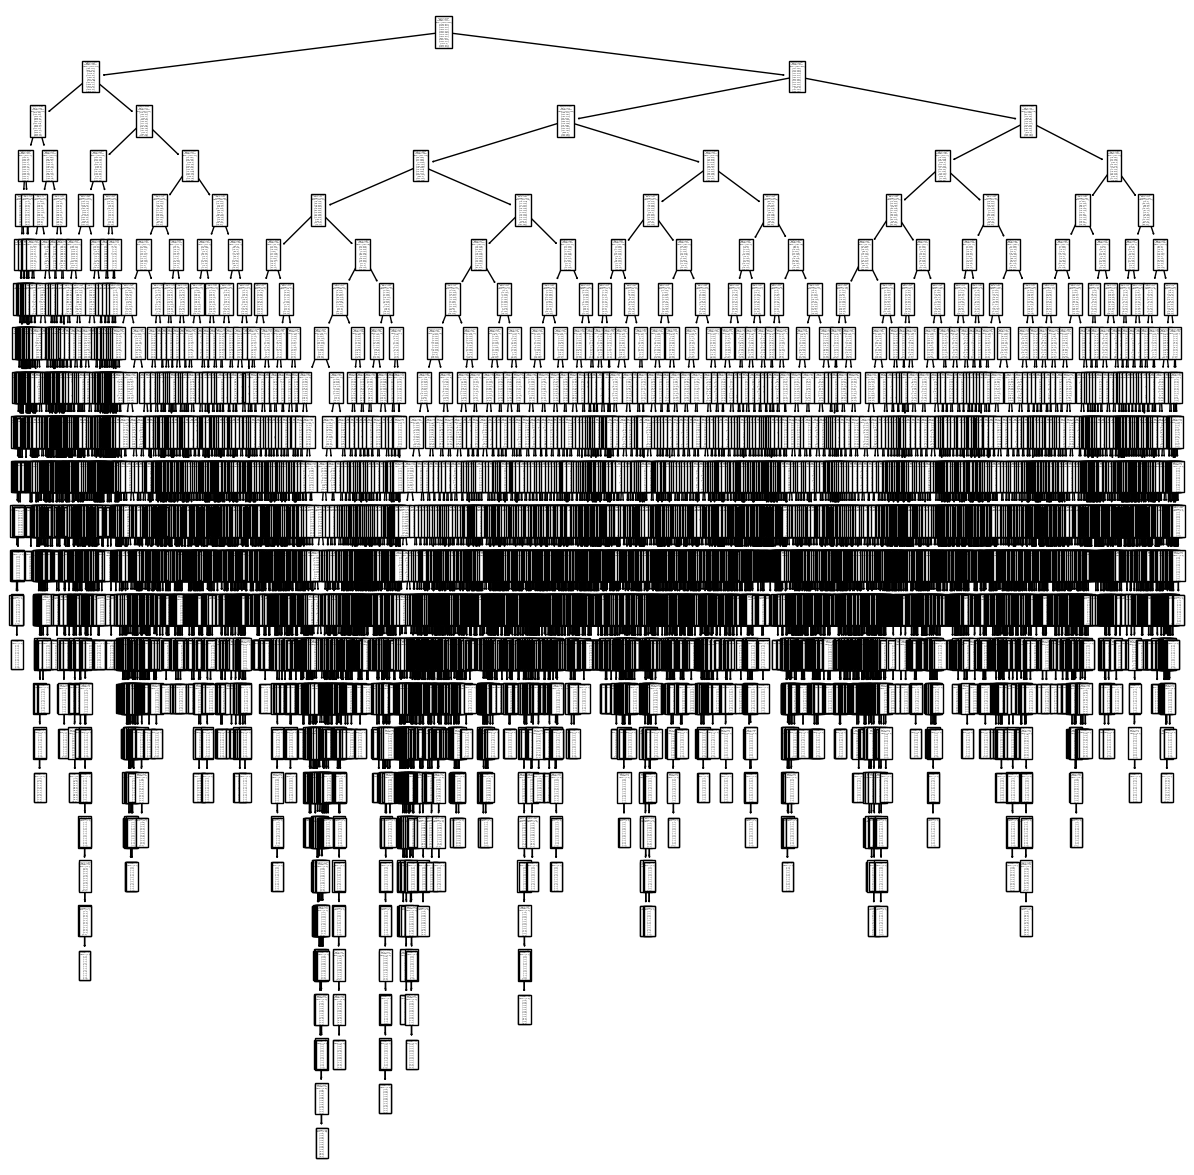

In [12]:
#Run Decision Tree classifier
climate = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climate)

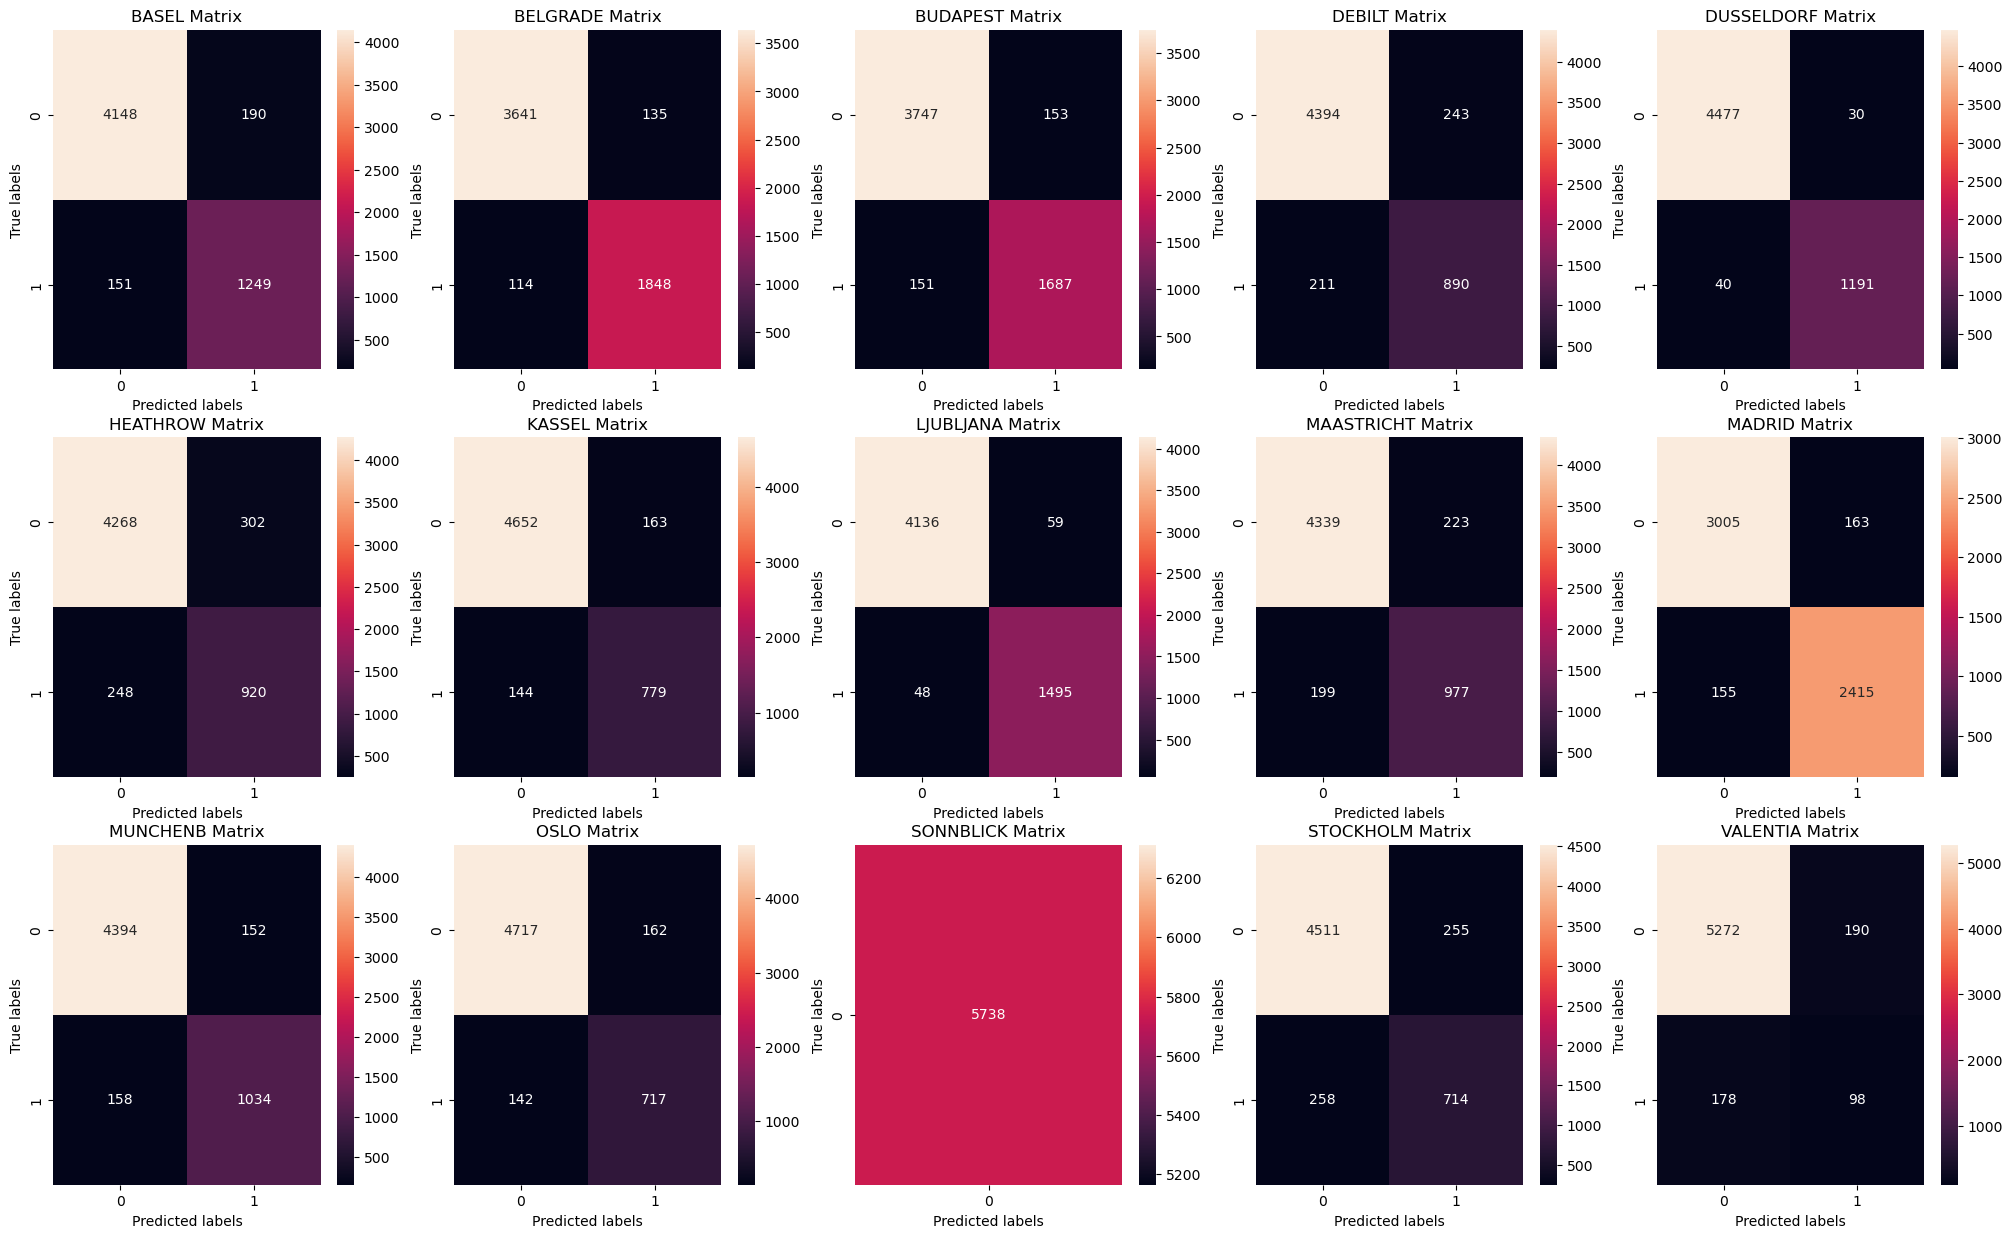

In [13]:
y_pred = climate.predict(X_test)
locations = list({x.split("_")[0] for x in answers.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1